In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import tensorflow as tf
from PIL import Image
import keras.utils as image
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from tensorflow.keras.applications.mobilenet_v3 import preprocess_input

In [4]:
def load_model():
  model_path = '/content/drive/MyDrive/plant-disease/Machine_Learning/models/93-10-model/saved_model' #path sesuai sama tempat saved_model
  model = tf.saved_model.load(model_path)
  return model

In [5]:
def plant_disease_prediction(file_path): #file path nya buat image user
  img = image.load_img(file_path)
  x = image.img_to_array(img)
  x = x/255.0
  x = tf.image.resize(x, (224, 224))
  x = np.expand_dims(x, axis=0)
  x = preprocess_input(x)

  plant_disease_class = ['Cabai - Antraknosa', 'Cabai - Rebah Kecambah', 'Cabai - Daun Keriting', 'Cabai - Bercak Daun', 'Cabai - Sehat',
                         'Cabai - Kutu Kebul/Kutu Putih', 'Cabai - Virus Kuning', 'Jagung - Bercak Daun Abu-Abu', 'Jagung - Karat Daun',
                         'Jagung - Hawar Daun Jagung', 'Jagung - Sehat', 'Jeruk - Bercak Hitam', 'Jeruk - Naga Kuning', 'Jeruk - Kanker',
                         'Jeruk - Melanosis (Busuk Pangkal Buah)', 'Jeruk - Kudis', 'Jeruk - Sehat', 'Kedelai - Bakteri Pustul', 'Kedelai - Embun Bulu',
                         'Kedelai - Bercak Mata Katak', 'Kedelai - Hama Kumbang Berbisa', 'Kedelai - Hama Kumbang Mentimun', 'Kedelai - Hama Ulat', 'Kedelai - Hawar Daun Bakteri',
                         'Kedelai - Karat Daun', 'Kedelai - Virus Mosaik', 'Kedelai - Embun Tepung', 'Kedelai - Sehat', 'Kedelai - Hawar Daun Selatan',
                         'Kedelai - Sindrom Kematian Mendadak', 'Kedelai - Bercak Target', 'Kedelai - Mosaik Kuning', 'Kentang - Bercak Kering', 'Kentang - Busuk Akhir',
                         'Kentang - Sehat', 'Kopi Arabika - Bercak Daun Abu-Abu', 'Kopi Arabika - Karat Daun', 'Kopi Arabika - Penggorok Daun',
                         'Kopi Arabika - Hawar Daun Phoma', 'Kopi - Tungau Merah', 'Kopi - Sehat', 'Padi - Hawar Daun', 'Padi - Bercak Coklat',
                         'Padi - Kurang Sehat', 'Padi - Ketombe Daun', 'Padi - Sehat', 'Teh - Bercak Daun Alga (Ganggang)', 'Teh - Antraknosa',
                         'Teh - Bercak Mata Burung', 'Teh - Bercak Coklat', 'Teh - Bintik Daun Merah', 'Teh - Sehat', 'Tomat - Bintik Bakteri',
                         'Tomat - Bercak Kering', 'Tomat - Bercak Akhir', 'Tomat - Jamur Daun Tomat / Kapang Daun Tomat', 'Tomat - Virus Mosaik',
                         'Tomat - Sehat', 'Tomat - Bercak Daun Septoria', 'Tomat - Tungau Laba-Laba', 'Tomat - Bercak Target', 'Tomat - Virus Kuning Keriting']
  model = load_model()
  pred = model(x)
  index = np.argmax(pred)
  pred_pd = plant_disease_class[index]
  plt.imshow(img)
  plt.show()

  def plant_names(pred_pd):
    pn = pred_pd.split(" - ")[0]
    return pn

  def plant_condition(pred_pd):
    pc = pred_pd.split(" - ")[1]
    if pc != 'Sehat':
      return "Sakit"
    else:
      return "Sehat"

  def plants_disease_name(pred_pd):
    pd = pred_pd.split(" - ")[1]
    if pd != 'Sehat':
      return pd
    else:
      return "---"

  return print("Tanaman : {}\n".format(plant_names(pred_pd)) + "Kondisi Tanaman : {}\n".format(plant_condition(pred_pd)) + "Terkena Penyakit: {}.".format(plants_disease_name(pred_pd)))

In [6]:
images_path = "/content/drive/MyDrive/plant-disease/Machine_Learning/Datasets/TEST/Teh - Antraknosa/Anthracnose_in_tea27.jpg"

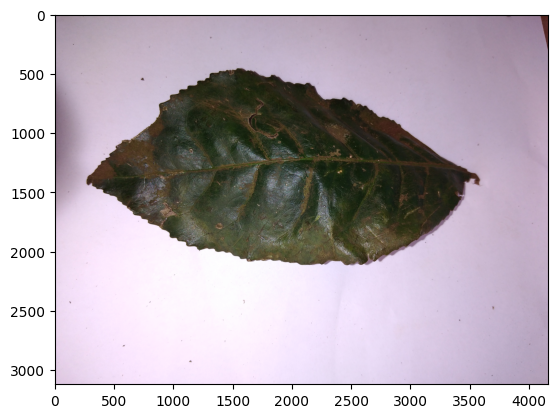

Tanaman : Teh
Kondisi Tanaman : Sakit
Terkena Penyakit: Antraknosa.


In [7]:
plant_disease_prediction(images_path)